In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [3]:
#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("./Data/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
#data types
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [5]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN"], 1)
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   NAME                    34299 non-null  object
 1   APPLICATION_TYPE        34299 non-null  object
 2   AFFILIATION             34299 non-null  object
 3   CLASSIFICATION          34299 non-null  object
 4   USE_CASE                34299 non-null  object
 5   ORGANIZATION            34299 non-null  object
 6   STATUS                  34299 non-null  int64 
 7   INCOME_AMT              34299 non-null  object
 8   SPECIAL_CONSIDERATIONS  34299 non-null  object
 9   ASK_AMT                 34299 non-null  int64 
 10  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 2.9+ MB


C:\Users\jayce\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [6]:
application_df.shape

(34299, 11)

In [7]:
# Determine the number of unique values in each column.
application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [8]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df["APPLICATION_TYPE"].value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

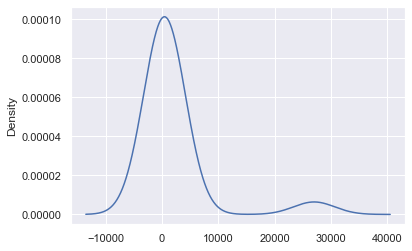

In [9]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [10]:
list(application_counts[application_counts < 500].index)

['T9', 'T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']

In [11]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [12]:
# Look at CLASSIFICATION value counts for binning
class_counts = application_df["CLASSIFICATION"].value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

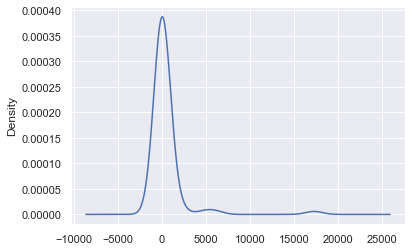

In [13]:
# Visualize the value counts of CLASSIFICATION
class_counts.plot.density()

In [14]:
list(class_counts[class_counts < 1000].index)

['C7000',
 'C1700',
 'C4000',
 'C5000',
 'C1270',
 'C2700',
 'C2800',
 'C7100',
 'C1300',
 'C1280',
 'C1230',
 'C1400',
 'C7200',
 'C2300',
 'C1240',
 'C8000',
 'C7120',
 'C1500',
 'C1800',
 'C6000',
 'C1250',
 'C8200',
 'C1238',
 'C1278',
 'C1235',
 'C1237',
 'C7210',
 'C2400',
 'C1720',
 'C4100',
 'C1257',
 'C1600',
 'C1260',
 'C2710',
 'C0',
 'C3200',
 'C1234',
 'C1246',
 'C1267',
 'C1256',
 'C2190',
 'C4200',
 'C2600',
 'C5200',
 'C1370',
 'C1248',
 'C6100',
 'C1820',
 'C1900',
 'C1236',
 'C3700',
 'C2570',
 'C1580',
 'C1245',
 'C2500',
 'C1570',
 'C1283',
 'C2380',
 'C1732',
 'C1728',
 'C2170',
 'C4120',
 'C8210',
 'C2561',
 'C4500',
 'C2150']

In [15]:
# Determine which values to replace if counts are less than ..?
replace_class = list(class_counts[class_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [16]:
name_counts = application_df["NAME"].value_counts()
name_counts

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

<AxesSubplot:ylabel='Density'>

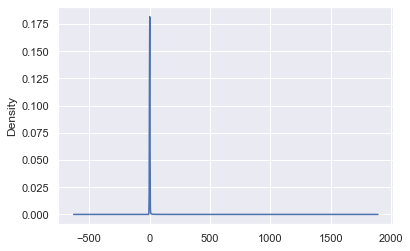

In [17]:
name_counts.plot.density()

In [18]:
name_counts[name_counts <= 1]

ARTS SCIENCE AND TECHNOLOGY EDUCATIONAL CORPORATION OF TEHACHA          1
UPTE-CWA RETIRED MEMBERS CHAPTER 9119                                   1
WORLD PRESIDENTS ORGANIZATION INC                                       1
HOMELESS ANIMAL RESCUE TEAM                                             1
DREAM WEAVER CHARITABLE TR                                              1
                                                                       ..
ST LOUIS SLAM WOMENS FOOTBALL                                           1
AIESEC ALUMNI IBEROAMERICA CORP                                         1
WEALLBLEEDRED ORG INC                                                   1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI    1
WATERHOUSE CHARITABLE TR                                                1
Name: NAME, Length: 18776, dtype: int64

In [19]:
name_counts[name_counts <= 5]

FLORIDA FAMILY CHILD CARE HOME ASSOCIATION INC                          5
GERONTOLOGICAL ADVANCED PRACTICE NURSES ASSOCIATION                     5
INTERNATIONL TRANSPLANT NURSES SOCIETY                                  5
NATIONAL ORGANIZATION FOR WOMEN INC                                     5
PTA HAWAII CONGRESS                                                     5
                                                                       ..
ST LOUIS SLAM WOMENS FOOTBALL                                           1
AIESEC ALUMNI IBEROAMERICA CORP                                         1
WEALLBLEEDRED ORG INC                                                   1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI    1
WATERHOUSE CHARITABLE TR                                                1
Name: NAME, Length: 19214, dtype: int64

In [20]:
name_counts[((name_counts <= 100) & (name_counts > 5))]

AIR FORCE ASSOCIATION                                      99
WORKERS UNITED                                             97
GAMMA THETA UPSILON                                        92
INTERNATIONAL ASSOCIATION OF FIRE FIGHTERS                 91
SOCIETY OF SAINT VINCENT DE PAUL COUNCIL OF LOS ANGELES    87
                                                           ..
OLD OAK CLIFF CONSERVATION LEAGUE INC                       6
AMERICAN NEPHROLOGY NURSES ASSOCIATION                      6
HUMBLE ISD EDUCATIONAL SUPPORT GROUPS INC                   6
PROFESSIONAL LOADMASTER ASSOCIATION                         6
CBMC INC                                                    6
Name: NAME, Length: 324, dtype: int64

In [21]:
len(name_counts[name_counts > 100])

30

In [22]:
replace_application = list(name_counts[name_counts <= 1].index)

for app in replace_application:
    application_df["NAME"] = application_df["NAME"].replace(app, "No_repeat")
    
application_df.NAME.value_counts()

No_repeat                                                             18776
PARENT BOOSTER USA INC                                                 1260
TOPS CLUB INC                                                           765
UNITED STATES BOWLING CONGRESS INC                                      700
WASHINGTON STATE UNIVERSITY                                             492
                                                                      ...  
WASHINGTON EXPLORER SEARCH AND RESCUE                                     2
INTERNATIONAL ALLIANCE THEATRICAL STAGE EMPLOYEES & MOVING PICTURE        2
BIRTH NETWORK                                                             2
NATIONAL ASSOCIATON OF CORPORATE DIRECTORS                                2
NATIONAL SOCIETY COLONIAL DAMES XVII CENTURY                              2
Name: NAME, Length: 793, dtype: int64

In [23]:
replace_application = list(name_counts[name_counts <= 5].index)

for app in replace_application:
    application_df["NAME"] = application_df["NAME"].replace(app, "Infrequent")
    
application_df.NAME.value_counts()

No_repeat                                       18776
Infrequent                                       1267
PARENT BOOSTER USA INC                           1260
TOPS CLUB INC                                     765
UNITED STATES BOWLING CONGRESS INC                700
                                                ...  
HABITAT FOR HUMANITY INTERNATIONAL                  6
DAMAGE PREVENTION COUNCIL OF TEXAS                  6
FLEET RESERVE ASSOCIATION                           6
HUGH OBRIAN YOUTH LEADERSHIP                        6
INTERNATIONAL CONGRESS OF CHURCHES MINISTERS        6
Name: NAME, Length: 356, dtype: int64

In [24]:
replace_application = list(name_counts[name_counts <= 100].index)

for app in replace_application:
    application_df["NAME"] = application_df["NAME"].replace(app,"Frequent")
    
application_df.NAME.value_counts()

No_repeat                                                             18776
Frequent                                                               5944
Infrequent                                                             1267
PARENT BOOSTER USA INC                                                 1260
TOPS CLUB INC                                                           765
UNITED STATES BOWLING CONGRESS INC                                      700
WASHINGTON STATE UNIVERSITY                                             492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                         408
PTA TEXAS CONGRESS                                                      368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                           331
ALPHA PHI SIGMA                                                         313
TOASTMASTERS INTERNATIONAL                                              293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                       287
LITTLE LEAGU

In [25]:
replace_application = list(name_counts[name_counts > 100].index)

for app in replace_application:
    application_df["NAME"] = application_df["NAME"].replace(app, "Habitual")
    
application_df.NAME.value_counts()

No_repeat     18776
Habitual       8312
Frequent       5944
Infrequent     1267
Name: NAME, dtype: int64

In [26]:
application_df.dtypes

NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [27]:
[application_df.dtypes == "object"]

[NAME                       True
 APPLICATION_TYPE           True
 AFFILIATION                True
 CLASSIFICATION             True
 USE_CASE                   True
 ORGANIZATION               True
 STATUS                    False
 INCOME_AMT                 True
 SPECIAL_CONSIDERATIONS     True
 ASK_AMT                   False
 IS_SUCCESSFUL             False
 dtype: bool]

In [28]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [29]:
application_df[application_cat]

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS
0,Frequent,T10,Independent,C1000,ProductDev,Association,0,N
1,No_repeat,T3,Independent,C2000,Preservation,Co-operative,1-9999,N
2,No_repeat,T5,CompanySponsored,C3000,ProductDev,Association,0,N
3,No_repeat,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,N
4,No_repeat,T3,Independent,C1000,Heathcare,Trust,100000-499999,N
...,...,...,...,...,...,...,...,...
34294,No_repeat,T4,Independent,C1000,ProductDev,Association,0,N
34295,Habitual,T4,CompanySponsored,C3000,ProductDev,Association,0,N
34296,Infrequent,T3,CompanySponsored,C2000,Preservation,Association,0,N
34297,No_repeat,T5,Independent,C3000,ProductDev,Association,0,N


In [30]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\jayce\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,NAME_Frequent,NAME_Habitual,NAME_Infrequent,NAME_No_repeat,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [31]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

C:\Users\jayce\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_Frequent,NAME_Habitual,NAME_Infrequent,NAME_No_repeat,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [32]:
application_df.shape

(34299, 48)

In [33]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   STATUS                        34299 non-null  int64  
 1   ASK_AMT                       34299 non-null  int64  
 2   IS_SUCCESSFUL                 34299 non-null  int64  
 3   NAME_Frequent                 34299 non-null  float64
 4   NAME_Habitual                 34299 non-null  float64
 5   NAME_Infrequent               34299 non-null  float64
 6   NAME_No_repeat                34299 non-null  float64
 7   APPLICATION_TYPE_Other        34299 non-null  float64
 8   APPLICATION_TYPE_T10          34299 non-null  float64
 9   APPLICATION_TYPE_T19          34299 non-null  float64
 10  APPLICATION_TYPE_T3           34299 non-null  float64
 11  APPLICATION_TYPE_T4           34299 non-null  float64
 12  APPLICATION_TYPE_T5           34299 non-null  float64
 13  A

In [34]:
# Split our preprocessed data into our features and target arrays
X = application_df.drop(["IS_SUCCESSFUL"], 1).values

y = application_df["IS_SUCCESSFUL"].values

# Split the preprocessed data into a training and testing dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

C:\Users\jayce\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [35]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [36]:
len(X_train[0])

47

In [37]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = number_input_features * 3
hidden_nodes_layer2 = number_input_features * 2
hidden_nodes_layer3 = number_input_features * 1
hidden_nodes_layer4 = 20

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="sigmoid"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 141)               6768      
                                                                 
 dense_1 (Dense)             (None, 94)                13348     
                                                                 
 dense_2 (Dense)             (None, 47)                4465      
                                                                 
 dense_3 (Dense)             (None, 20)                960       
                                                                 
 dense_4 (Dense)             (None, 1)                 21        
                                                                 
Total params: 25,562
Trainable params: 25,562
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("Checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [39]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [41]:
# Create a callback that saves the model's weights every epoch


cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq= 5)

In [42]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 6:29 - loss: 0.9891 - accuracy: 0.4688
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 10/804 [..............................] - ETA: 5s - loss: 0.9186 - accuracy: 0.4406  
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 20/804 [..............................] - ETA: 4s - loss: 0.8312 - accuracy: 0.4547
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 30/804 [>.............................] - ETA: 4s - loss: 0.7853 - accuracy: 0.4792
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 40/804 [>.............................] - ETA: 4s - loss: 0.7592 - accuracy: 0.4969
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 50/804 [>..............


Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
480/804 [================>.............] - ETA: 1s - loss: 0.5937 - accuracy: 0.6941
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
495/804 [=================>............] - ETA: 1s - loss: 0.5917 - accuracy: 0.6955
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
510/804 [==================>...........] - ETA: 1s - loss: 0.5909 - accuracy: 0.6968
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
525/804 [==================>...........] - ETA: 1s - loss: 0.5887 - accuracy: 0.6990
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving

161/804 [=====>........................] - ETA: 2s - loss: 0.5383 - accuracy: 0.7403
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
176/804 [=====>........................] - ETA: 2s - loss: 0.5367 - accuracy: 0.7418
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
191/804 [======>.......................] - ETA: 2s - loss: 0.5384 - accuracy: 0.7405
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
206/804 [======>.......................] - ETA: 2s - loss: 0.5368 - accuracy: 0.7415
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
221/804 [=======


Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.5288 - accuracy: 0.7453
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.5292 - accuracy: 0.7448
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 0.5291 - accuracy: 0.7447
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.5297 - accuracy: 0.7443
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving


Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
342/804 [===========>..................] - ETA: 1s - loss: 0.5188 - accuracy: 0.7513
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
357/804 [============>.................] - ETA: 1s - loss: 0.5185 - accuracy: 0.7518
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
372/804 [============>.................] - ETA: 1s - loss: 0.5182 - accuracy: 0.7521
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
387/804 [=============>................] - ETA: 1s - loss: 0.5188 - accuracy: 0.7515
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving

 13/804 [..............................] - ETA: 3s - loss: 0.4853 - accuracy: 0.7644
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
 28/804 [>.............................] - ETA: 3s - loss: 0.4898 - accuracy: 0.7645
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
 43/804 [>.............................] - ETA: 3s - loss: 0.5035 - accuracy: 0.7587
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
 58/804 [=>............................] - ETA: 3s - loss: 0.5151 - accuracy: 0.7489
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
 73/804 [=>.....


Epoch 4: saving model to checkpoints\weights.04.hdf5
493/804 [=================>............] - ETA: 1s - loss: 0.5244 - accuracy: 0.7474
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
508/804 [=================>............] - ETA: 1s - loss: 0.5247 - accuracy: 0.7471
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
523/804 [==================>...........] - ETA: 1s - loss: 0.5244 - accuracy: 0.7473
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
538/804 [===================>..........] - ETA: 1s - loss: 0.5238 - accuracy: 0.7477
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving

179/804 [=====>........................] - ETA: 2s - loss: 0.5225 - accuracy: 0.7503
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
194/804 [======>.......................] - ETA: 2s - loss: 0.5204 - accuracy: 0.7534
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
209/804 [======>.......................] - ETA: 2s - loss: 0.5205 - accuracy: 0.7537
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
224/804 [=======>......................] - ETA: 2s - loss: 0.5238 - accuracy: 0.7521
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
239/804 [=======

674/804 [========================>.....] - ETA: 0s - loss: 0.5208 - accuracy: 0.7523
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.5212 - accuracy: 0.7515
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.5208 - accuracy: 0.7513
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.5200 - accuracy: 0.7519
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
734/804 [=======

360/804 [============>.................] - ETA: 1s - loss: 0.5163 - accuracy: 0.7530
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
375/804 [============>.................] - ETA: 1s - loss: 0.5144 - accuracy: 0.7545
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
390/804 [=============>................] - ETA: 1s - loss: 0.5149 - accuracy: 0.7542
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
405/804 [==============>...............] - ETA: 1s - loss: 0.5146 - accuracy: 0.7539
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
420/804 [=======

 46/804 [>.............................] - ETA: 2s - loss: 0.5198 - accuracy: 0.7554
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
 61/804 [=>............................] - ETA: 2s - loss: 0.5178 - accuracy: 0.7567
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
 76/804 [=>............................] - ETA: 2s - loss: 0.5154 - accuracy: 0.7590
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
 91/804 [==>...........................] - ETA: 2s - loss: 0.5181 - accuracy: 0.7572
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
106/804 [==>....


Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
551/804 [===================>..........] - ETA: 0s - loss: 0.5182 - accuracy: 0.7542
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
566/804 [====================>.........] - ETA: 0s - loss: 0.5183 - accuracy: 0.7539
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
581/804 [====================>.........] - ETA: 0s - loss: 0.5182 - accuracy: 0.7535
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
596/804 [=====================>........] - ETA: 0s - loss: 0.5179 - accuracy: 0.7536
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving

222/804 [=======>......................] - ETA: 2s - loss: 0.5095 - accuracy: 0.7601
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
237/804 [=======>......................] - ETA: 2s - loss: 0.5072 - accuracy: 0.7615
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
252/804 [========>.....................] - ETA: 2s - loss: 0.5081 - accuracy: 0.7609
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
267/804 [========>.....................] - ETA: 2s - loss: 0.5080 - accuracy: 0.7612
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
282/804 [=======

717/804 [=========================>....] - ETA: 0s - loss: 0.5152 - accuracy: 0.7541
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.5152 - accuracy: 0.7538
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.5151 - accuracy: 0.7539
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.5148 - accuracy: 0.7541
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
777/804 [=======

378/804 [=============>................] - ETA: 1s - loss: 0.5119 - accuracy: 0.7530
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
393/804 [=============>................] - ETA: 1s - loss: 0.5123 - accuracy: 0.7533
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
408/804 [==============>...............] - ETA: 1s - loss: 0.5130 - accuracy: 0.7528
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
423/804 [==============>...............] - ETA: 1s - loss: 0.5133 - accuracy: 0.7526
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
438/804 [=======

 59/804 [=>............................] - ETA: 2s - loss: 0.5176 - accuracy: 0.7516
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
 74/804 [=>............................] - ETA: 2s - loss: 0.5191 - accuracy: 0.7496
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
 89/804 [==>...........................] - ETA: 2s - loss: 0.5180 - accuracy: 0.7489
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
104/804 [==>...........................] - ETA: 2s - loss: 0.5147 - accuracy: 0.7536
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
119/


Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
559/804 [===================>..........] - ETA: 0s - loss: 0.5108 - accuracy: 0.7553
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
574/804 [====================>.........] - ETA: 0s - loss: 0.5115 - accuracy: 0.7548
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
589/804 [====================>.........] - ETA: 0s - loss: 0.5120 - accuracy: 0.7542
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
604/804 [=====================>........] - ETA: 0s - loss: 0.5126 - accuracy: 0.7536
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epo


Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
240/804 [=======>......................] - ETA: 2s - loss: 0.5152 - accuracy: 0.7513
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
255/804 [========>.....................] - ETA: 2s - loss: 0.5151 - accuracy: 0.7518
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
270/804 [=========>....................] - ETA: 2s - loss: 0.5142 - accuracy: 0.7521
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
285/804 [=========>....................] - ETA: 2s - loss: 0.5136 - accuracy: 0.7530
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epo


Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.5117 - accuracy: 0.7546
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.5124 - accuracy: 0.7540
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.5127 - accuracy: 0.7537
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.5129 - accuracy: 0.7535
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epo


Epoch 12: saving model to checkpoints\weights.12.hdf5
411/804 [==============>...............] - ETA: 1s - loss: 0.5143 - accuracy: 0.7533
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
426/804 [==============>...............] - ETA: 1s - loss: 0.5125 - accuracy: 0.7547
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
441/804 [===============>..............] - ETA: 1s - loss: 0.5124 - accuracy: 0.7553
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
456/804 [================>.............] - ETA: 1s - loss: 0.5122 - accuracy: 0.7551
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epo

 87/804 [==>...........................] - ETA: 2s - loss: 0.5104 - accuracy: 0.7590
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
102/804 [==>...........................] - ETA: 2s - loss: 0.5047 - accuracy: 0.7629
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
117/804 [===>..........................] - ETA: 2s - loss: 0.5006 - accuracy: 0.7682
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
132/804 [===>..........................] - ETA: 2s - loss: 0.5044 - accuracy: 0.7656
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
147/

582/804 [====================>.........] - ETA: 0s - loss: 0.5121 - accuracy: 0.7530
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
597/804 [=====================>........] - ETA: 0s - loss: 0.5118 - accuracy: 0.7531
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
612/804 [=====================>........] - ETA: 0s - loss: 0.5119 - accuracy: 0.7527
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
627/804 [======================>.......] - ETA: 0s - loss: 0.5118 - accuracy: 0.7526
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
642/

258/804 [========>.....................] - ETA: 2s - loss: 0.5085 - accuracy: 0.7550
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
268/804 [=========>....................] - ETA: 2s - loss: 0.5076 - accuracy: 0.7557
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
278/804 [=========>....................] - ETA: 2s - loss: 0.5073 - accuracy: 0.7564
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
288/804 [=========>....................] - ETA: 2s - loss: 0.5081 - accuracy: 0.7556
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
299/804 [==========>...................] - ETA: 2s - loss: 0.5080 - accuracy: 0.7565
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
308/804 [==========>..........


Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.5109 - accuracy: 0.7552
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.5108 - accuracy: 0.7550
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.5110 - accuracy: 0.7546
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.5108 - accuracy: 0.7546
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epo


Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
419/804 [==============>...............] - ETA: 1s - loss: 0.5102 - accuracy: 0.7573
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
434/804 [===============>..............] - ETA: 1s - loss: 0.5092 - accuracy: 0.7580
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
449/804 [===============>..............] - ETA: 1s - loss: 0.5088 - accuracy: 0.7577
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
464/804 [================>.............] - ETA: 1s - loss: 0.5095 - accuracy: 0.7573
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epo

 90/804 [==>...........................] - ETA: 2s - loss: 0.5060 - accuracy: 0.7580
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
105/804 [==>...........................] - ETA: 2s - loss: 0.5067 - accuracy: 0.7580
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
120/804 [===>..........................] - ETA: 2s - loss: 0.5018 - accuracy: 0.7594
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
135/804 [====>.........................] - ETA: 2s - loss: 0.5074 - accuracy: 0.7563
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
150/

580/804 [====================>.........] - ETA: 0s - loss: 0.5099 - accuracy: 0.7549
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
595/804 [=====================>........] - ETA: 0s - loss: 0.5099 - accuracy: 0.7549
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
610/804 [=====================>........] - ETA: 0s - loss: 0.5095 - accuracy: 0.7551
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
625/804 [======================>.......] - ETA: 0s - loss: 0.5098 - accuracy: 0.7551
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
640/

256/804 [========>.....................] - ETA: 2s - loss: 0.5060 - accuracy: 0.7605
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
271/804 [=========>....................] - ETA: 2s - loss: 0.5068 - accuracy: 0.7595
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
286/804 [=========>....................] - ETA: 2s - loss: 0.5059 - accuracy: 0.7598
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
301/804 [==========>...................] - ETA: 1s - loss: 0.5033 - accuracy: 0.7616
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
316/

751/804 [===========================>..] - ETA: 0s - loss: 0.5070 - accuracy: 0.7574
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.5070 - accuracy: 0.7574
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.5075 - accuracy: 0.7573
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.5075 - accuracy: 0.7576
Epoch 17: saving model to checkpoints\weights.17.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5078 - accuracy: 0.7574
Epoch 18/100
  1/804 [...

432/804 [===============>..............] - ETA: 1s - loss: 0.5082 - accuracy: 0.7536
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
447/804 [===============>..............] - ETA: 1s - loss: 0.5066 - accuracy: 0.7550
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
462/804 [================>.............] - ETA: 1s - loss: 0.5061 - accuracy: 0.7555
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
477/804 [================>.............] - ETA: 1s - loss: 0.5059 - accuracy: 0.7557
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
492/


Epoch 19: saving model to checkpoints\weights.19.hdf5
118/804 [===>..........................] - ETA: 2s - loss: 0.5150 - accuracy: 0.7524
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
133/804 [===>..........................] - ETA: 2s - loss: 0.5155 - accuracy: 0.7516
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
148/804 [====>.........................] - ETA: 2s - loss: 0.5158 - accuracy: 0.7515
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
163/804 [=====>........................] - ETA: 2s - loss: 0.5164 - accuracy: 0.7527
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epo

583/804 [====================>.........] - ETA: 0s - loss: 0.5086 - accuracy: 0.7561
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
598/804 [=====================>........] - ETA: 0s - loss: 0.5086 - accuracy: 0.7561
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
613/804 [=====================>........] - ETA: 0s - loss: 0.5083 - accuracy: 0.7561
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 0.5080 - accuracy: 0.7563
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
643/


Epoch 20: saving model to checkpoints\weights.20.hdf5
269/804 [=========>....................] - ETA: 2s - loss: 0.5009 - accuracy: 0.7572
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
284/804 [=========>....................] - ETA: 1s - loss: 0.5029 - accuracy: 0.7568
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
298/804 [==========>...................] - ETA: 1s - loss: 0.5005 - accuracy: 0.7591
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
309/804 [==========>...................] - ETA: 1s - loss: 0.5001 - accuracy: 0.7607
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
324/

754/804 [===========================>..] - ETA: 0s - loss: 0.5062 - accuracy: 0.7566
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.5068 - accuracy: 0.7562
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.5065 - accuracy: 0.7564
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.5064 - accuracy: 0.7562
Epoch 20: saving model to checkpoints\weights.20.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5064 - accuracy: 0.7561
Epoch 21/100
  1/804 [...


Epoch 21: saving model to checkpoints\weights.21.hdf5
435/804 [===============>..............] - ETA: 1s - loss: 0.5027 - accuracy: 0.7584
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
450/804 [===============>..............] - ETA: 1s - loss: 0.5030 - accuracy: 0.7583
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
465/804 [================>.............] - ETA: 1s - loss: 0.5038 - accuracy: 0.7582
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
480/804 [================>.............] - ETA: 1s - loss: 0.5038 - accuracy: 0.7587
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epo


Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
121/804 [===>..........................] - ETA: 2s - loss: 0.5088 - accuracy: 0.7567
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
136/804 [====>.........................] - ETA: 2s - loss: 0.5051 - accuracy: 0.7597
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
151/804 [====>.........................] - ETA: 2s - loss: 0.5075 - accuracy: 0.7593
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
166/804 [=====>........................] - ETA: 2s - loss: 0.5050 - accuracy: 0.7628
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epo


Epoch 22: saving model to checkpoints\weights.22.hdf5
611/804 [=====================>........] - ETA: 0s - loss: 0.5054 - accuracy: 0.7572
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
626/804 [======================>.......] - ETA: 0s - loss: 0.5057 - accuracy: 0.7575
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 0.5055 - accuracy: 0.7578
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
656/804 [=======================>......] - ETA: 0s - loss: 0.5054 - accuracy: 0.7578
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epo


Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
297/804 [==========>...................] - ETA: 1s - loss: 0.5003 - accuracy: 0.7616
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
312/804 [==========>...................] - ETA: 1s - loss: 0.5016 - accuracy: 0.7600
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
327/804 [===========>..................] - ETA: 1s - loss: 0.5021 - accuracy: 0.7595
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
342/804 [===========>..................] - ETA: 1s - loss: 0.5029 - accuracy: 0.7590
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epo


Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.5037 - accuracy: 0.7579
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5044 - accuracy: 0.7574
Epoch 24/100
  1/804 [..............................] - ETA: 1s - loss: 0.6374 - accuracy: 0.5938
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
 13/804 [..............................] - ETA: 3s - loss: 0.4902 - accuracy: 0.7692
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
 28/804 [>.............................] - ETA: 3s - loss: 0.5002 - accuracy: 0.7567
Epoch 24: s

448/804 [===============>..............] - ETA: 1s - loss: 0.5069 - accuracy: 0.7584
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
462/804 [================>.............] - ETA: 1s - loss: 0.5069 - accuracy: 0.7585
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
473/804 [================>.............] - ETA: 1s - loss: 0.5069 - accuracy: 0.7585
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
483/804 [=================>............] - ETA: 1s - loss: 0.5065 - accuracy: 0.7587
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
497/804 [=================>............] - ETA: 1s - loss: 0.5061 - accuracy: 0.7590
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to che


Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
134/804 [====>.........................] - ETA: 2s - loss: 0.5115 - accuracy: 0.7549
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
149/804 [====>.........................] - ETA: 2s - loss: 0.5085 - accuracy: 0.7580
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
164/804 [=====>........................] - ETA: 2s - loss: 0.5090 - accuracy: 0.7572
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
179/804 [=====>........................] - ETA: 2s - loss: 0.5081 - accuracy: 0.7577
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epo


Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
629/804 [======================>.......] - ETA: 0s - loss: 0.5035 - accuracy: 0.7586
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
644/804 [=======================>......] - ETA: 0s - loss: 0.5037 - accuracy: 0.7587
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
659/804 [=======================>......] - ETA: 0s - loss: 0.5039 - accuracy: 0.7586
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.5043 - accuracy: 0.7586
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epo

300/804 [==========>...................] - ETA: 1s - loss: 0.5072 - accuracy: 0.7580
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
315/804 [==========>...................] - ETA: 1s - loss: 0.5051 - accuracy: 0.7597
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
330/804 [===========>..................] - ETA: 1s - loss: 0.5054 - accuracy: 0.7591
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
345/804 [===========>..................] - ETA: 1s - loss: 0.5062 - accuracy: 0.7586
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
360/


Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5032 - accuracy: 0.7586
Epoch 27/100

Epoch 27: saving model to checkpoints\weights.27.hdf5
  1/804 [..............................] - ETA: 11s - loss: 0.5983 - accuracy: 0.6875
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
 16/804 [..............................] - ETA: 3s - loss: 0.4873 - accuracy: 0.7793 
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
 31/804 [>.............................] - ETA: 3s - loss: 0.4991 - accuracy: 0.7621
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\

481/804 [================>.............] - ETA: 1s - loss: 0.5042 - accuracy: 0.7616
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
496/804 [=================>............] - ETA: 1s - loss: 0.5042 - accuracy: 0.7611
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
511/804 [==================>...........] - ETA: 1s - loss: 0.5051 - accuracy: 0.7603
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
526/804 [==================>...........] - ETA: 1s - loss: 0.5056 - accuracy: 0.7602
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
541/

165/804 [=====>........................] - ETA: 2s - loss: 0.4876 - accuracy: 0.7706
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
180/804 [=====>........................] - ETA: 2s - loss: 0.4903 - accuracy: 0.7681
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
197/804 [======>.......................] - ETA: 2s - loss: 0.4933 - accuracy: 0.7646
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
214/804 [======>.......................] - ETA: 2s - loss: 0.4934 - accuracy: 0.7642
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epo

657/804 [=======================>......] - ETA: 0s - loss: 0.5027 - accuracy: 0.7610
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
672/804 [========================>.....] - ETA: 0s - loss: 0.5020 - accuracy: 0.7614
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.5019 - accuracy: 0.7615
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.5018 - accuracy: 0.7614
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
717/

338/804 [===========>..................] - ETA: 1s - loss: 0.5044 - accuracy: 0.7552
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
353/804 [============>.................] - ETA: 1s - loss: 0.5040 - accuracy: 0.7564
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
368/804 [============>.................] - ETA: 1s - loss: 0.5044 - accuracy: 0.7566
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
383/804 [=============>................] - ETA: 1s - loss: 0.5057 - accuracy: 0.7547
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
398/

  1/804 [..............................] - ETA: 1s - loss: 0.4997 - accuracy: 0.7500
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.4878 - accuracy: 0.7812
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
 29/804 [>.............................] - ETA: 3s - loss: 0.4676 - accuracy: 0.7909
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
 44/804 [>.............................] - ETA: 3s - loss: 0.4858 - accuracy: 0.7741
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
 59/

494/804 [=================>............] - ETA: 1s - loss: 0.4997 - accuracy: 0.7620
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
509/804 [=================>............] - ETA: 1s - loss: 0.4992 - accuracy: 0.7620
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
524/804 [==================>...........] - ETA: 1s - loss: 0.5002 - accuracy: 0.7613
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
539/804 [===================>..........] - ETA: 1s - loss: 0.5004 - accuracy: 0.7611
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
554/

170/804 [=====>........................] - ETA: 2s - loss: 0.4910 - accuracy: 0.7640
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
180/804 [=====>........................] - ETA: 2s - loss: 0.4929 - accuracy: 0.7627
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
190/804 [======>.......................] - ETA: 2s - loss: 0.4916 - accuracy: 0.7638
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
200/804 [======>.......................] - ETA: 2s - loss: 0.4941 - accuracy: 0.7613
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
215/804 [=======>......................] - ETA: 2s - loss: 0.4957 - accuracy: 0.7594
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to che

655/804 [=======================>......] - ETA: 0s - loss: 0.5007 - accuracy: 0.7599
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.5020 - accuracy: 0.7593
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 0.5016 - accuracy: 0.7595
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.5016 - accuracy: 0.7598
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
715/


Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
346/804 [===========>..................] - ETA: 1s - loss: 0.4984 - accuracy: 0.7622
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
361/804 [============>.................] - ETA: 1s - loss: 0.4987 - accuracy: 0.7624
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
376/804 [=============>................] - ETA: 1s - loss: 0.4981 - accuracy: 0.7625
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
391/804 [=============>................] - ETA: 1s - loss: 0.4995 - accuracy: 0.7619
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epo


Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
 27/804 [>.............................] - ETA: 3s - loss: 0.4993 - accuracy: 0.7616
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
 42/804 [>.............................] - ETA: 3s - loss: 0.5008 - accuracy: 0.7522
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
 57/804 [=>............................] - ETA: 2s - loss: 0.5120 - accuracy: 0.7511
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
 72/804 [=>............................] - ETA: 2s - loss: 0.5084 - accuracy: 0.7530
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epo


Epoch 33: saving model to checkpoints\weights.33.hdf5
517/804 [==================>...........] - ETA: 1s - loss: 0.5020 - accuracy: 0.7597
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
532/804 [==================>...........] - ETA: 1s - loss: 0.5010 - accuracy: 0.7607
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
547/804 [===================>..........] - ETA: 1s - loss: 0.5007 - accuracy: 0.7605
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
562/804 [===================>..........] - ETA: 0s - loss: 0.5003 - accuracy: 0.7610
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epo

193/804 [======>.......................] - ETA: 2s - loss: 0.5011 - accuracy: 0.7605
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
208/804 [======>.......................] - ETA: 2s - loss: 0.4989 - accuracy: 0.7625
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
223/804 [=======>......................] - ETA: 2s - loss: 0.4998 - accuracy: 0.7622
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
238/804 [=======>......................] - ETA: 2s - loss: 0.4984 - accuracy: 0.7637
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
253/


Epoch 34: saving model to checkpoints\weights.34.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 0.4989 - accuracy: 0.7624
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 0.4990 - accuracy: 0.7623
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.5000 - accuracy: 0.7619
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.4997 - accuracy: 0.7620
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epo

344/804 [===========>..................] - ETA: 1s - loss: 0.4899 - accuracy: 0.7687
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
359/804 [============>.................] - ETA: 1s - loss: 0.4902 - accuracy: 0.7680
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
374/804 [============>.................] - ETA: 1s - loss: 0.4903 - accuracy: 0.7682
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
389/804 [=============>................] - ETA: 1s - loss: 0.4913 - accuracy: 0.7678
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
404/


Epoch 36: saving model to checkpoints\weights.36.hdf5
 30/804 [>.............................] - ETA: 3s - loss: 0.4900 - accuracy: 0.7573
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
 45/804 [>.............................] - ETA: 3s - loss: 0.5048 - accuracy: 0.7479
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
 60/804 [=>............................] - ETA: 2s - loss: 0.4967 - accuracy: 0.7510
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
 75/804 [=>............................] - ETA: 2s - loss: 0.4901 - accuracy: 0.7588
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epo

515/804 [==================>...........] - ETA: 1s - loss: 0.5031 - accuracy: 0.7590
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
530/804 [==================>...........] - ETA: 1s - loss: 0.5016 - accuracy: 0.7602
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
545/804 [===================>..........] - ETA: 1s - loss: 0.5016 - accuracy: 0.7602
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
560/804 [===================>..........] - ETA: 0s - loss: 0.5008 - accuracy: 0.7607
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
575/

196/804 [======>.......................] - ETA: 2s - loss: 0.4975 - accuracy: 0.7612
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
211/804 [======>.......................] - ETA: 2s - loss: 0.4942 - accuracy: 0.7621
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
226/804 [=======>......................] - ETA: 2s - loss: 0.4943 - accuracy: 0.7627
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
241/804 [=======>......................] - ETA: 2s - loss: 0.4951 - accuracy: 0.7631
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
256/

691/804 [========================>.....] - ETA: 0s - loss: 0.5000 - accuracy: 0.7593
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.4993 - accuracy: 0.7598
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.4984 - accuracy: 0.7603
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.4981 - accuracy: 0.7606
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
751/

372/804 [============>.................] - ETA: 1s - loss: 0.4945 - accuracy: 0.7640
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
387/804 [=============>................] - ETA: 1s - loss: 0.4950 - accuracy: 0.7628
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
402/804 [==============>...............] - ETA: 1s - loss: 0.4954 - accuracy: 0.7627
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
417/804 [==============>...............] - ETA: 1s - loss: 0.4959 - accuracy: 0.7628
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
432/


Epoch 39: saving model to checkpoints\weights.39.hdf5
 58/804 [=>............................] - ETA: 3s - loss: 0.5056 - accuracy: 0.7543
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
 73/804 [=>............................] - ETA: 2s - loss: 0.4987 - accuracy: 0.7624
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
 88/804 [==>...........................] - ETA: 2s - loss: 0.4992 - accuracy: 0.7599
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
103/804 [==>...........................] - ETA: 2s - loss: 0.4983 - accuracy: 0.7609
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epo

546/804 [===================>..........] - ETA: 1s - loss: 0.4994 - accuracy: 0.7603
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
558/804 [===================>..........] - ETA: 0s - loss: 0.4991 - accuracy: 0.7609
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
568/804 [====================>.........] - ETA: 0s - loss: 0.4991 - accuracy: 0.7612
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
578/804 [====================>.........] - ETA: 0s - loss: 0.4997 - accuracy: 0.7605
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
588/804 [====================>.........] - ETA: 0s - loss: 0.4997 - accuracy: 0.7604
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to che


Epoch 40: saving model to checkpoints\weights.40.hdf5
209/804 [======>.......................] - ETA: 2s - loss: 0.4992 - accuracy: 0.7647
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
224/804 [=======>......................] - ETA: 2s - loss: 0.4990 - accuracy: 0.7653
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
239/804 [=======>......................] - ETA: 2s - loss: 0.4987 - accuracy: 0.7656
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
254/804 [========>.....................] - ETA: 2s - loss: 0.4973 - accuracy: 0.7666
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epo


Epoch 40: saving model to checkpoints\weights.40.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.4987 - accuracy: 0.7627
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.4986 - accuracy: 0.7628
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.4983 - accuracy: 0.7629
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.4989 - accuracy: 0.7619
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epo


Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
390/804 [=============>................] - ETA: 1s - loss: 0.4978 - accuracy: 0.7620
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
405/804 [==============>...............] - ETA: 1s - loss: 0.4974 - accuracy: 0.7614
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
420/804 [==============>...............] - ETA: 1s - loss: 0.4974 - accuracy: 0.7618
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
435/804 [===============>..............] - ETA: 1s - loss: 0.4989 - accuracy: 0.7601
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epo

 61/804 [=>............................] - ETA: 2s - loss: 0.5031 - accuracy: 0.7602
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
 76/804 [=>............................] - ETA: 2s - loss: 0.5079 - accuracy: 0.7595
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
 91/804 [==>...........................] - ETA: 2s - loss: 0.5087 - accuracy: 0.7569
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
106/804 [==>...........................] - ETA: 2s - loss: 0.4999 - accuracy: 0.7627
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
121/

556/804 [===================>..........] - ETA: 0s - loss: 0.4967 - accuracy: 0.7608
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
571/804 [====================>.........] - ETA: 0s - loss: 0.4968 - accuracy: 0.7607
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
586/804 [====================>.........] - ETA: 0s - loss: 0.4968 - accuracy: 0.7607
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.4959 - accuracy: 0.7612
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
616/

237/804 [=======>......................] - ETA: 2s - loss: 0.4968 - accuracy: 0.7625
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
252/804 [========>.....................] - ETA: 2s - loss: 0.4966 - accuracy: 0.7635
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
267/804 [========>.....................] - ETA: 2s - loss: 0.4955 - accuracy: 0.7647
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
282/804 [=========>....................] - ETA: 1s - loss: 0.4950 - accuracy: 0.7636
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
297/

727/804 [==========================>...] - ETA: 0s - loss: 0.4970 - accuracy: 0.7622
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.4974 - accuracy: 0.7620
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.4976 - accuracy: 0.7619
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.4975 - accuracy: 0.7621
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
787/


Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
418/804 [==============>...............] - ETA: 1s - loss: 0.4959 - accuracy: 0.7650
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
433/804 [===============>..............] - ETA: 1s - loss: 0.4971 - accuracy: 0.7641
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
448/804 [===============>..............] - ETA: 1s - loss: 0.4960 - accuracy: 0.7644
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
463/804 [================>.............] - ETA: 1s - loss: 0.4966 - accuracy: 0.7639
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epo

 74/804 [=>............................] - ETA: 2s - loss: 0.4805 - accuracy: 0.7732
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
 89/804 [==>...........................] - ETA: 2s - loss: 0.4824 - accuracy: 0.7690
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
104/804 [==>...........................] - ETA: 2s - loss: 0.4857 - accuracy: 0.7680
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
119/804 [===>..........................] - ETA: 2s - loss: 0.4884 - accuracy: 0.7642
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
134/

542/804 [===================>..........] - ETA: 1s - loss: 0.4934 - accuracy: 0.7642
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
550/804 [===================>..........] - ETA: 1s - loss: 0.4935 - accuracy: 0.7641
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
563/804 [====================>.........] - ETA: 1s - loss: 0.4941 - accuracy: 0.7633
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
574/804 [====================>.........] - ETA: 1s - loss: 0.4948 - accuracy: 0.7631
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
589/804 [====================>.........] - ETA: 0s - loss: 0.4960 - accuracy: 0.7625
Epoch 45: saving model to che


Epoch 46: saving model to checkpoints\weights.46.hdf5
192/804 [======>.......................] - ETA: 2s - loss: 0.4961 - accuracy: 0.7650
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
204/804 [======>.......................] - ETA: 2s - loss: 0.4946 - accuracy: 0.7664
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
214/804 [======>.......................] - ETA: 2s - loss: 0.4943 - accuracy: 0.7666
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
225/804 [=======>......................] - ETA: 2s - loss: 0.4948 - accuracy: 0.7667
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
240/804 [=======>......................] - ETA: 2s - loss: 

659/804 [=======================>......] - ETA: 0s - loss: 0.4980 - accuracy: 0.7608
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 0.4984 - accuracy: 0.7607
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.4985 - accuracy: 0.7605
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
695/804 [========================>.....] - ETA: 0s - loss: 0.4983 - accuracy: 0.7605
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.4974 - accuracy: 0.7611
Epoch 46: saving model to che

316/804 [==========>...................] - ETA: 2s - loss: 0.4963 - accuracy: 0.7635
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
329/804 [===========>..................] - ETA: 2s - loss: 0.4957 - accuracy: 0.7642
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
341/804 [===========>..................] - ETA: 2s - loss: 0.4955 - accuracy: 0.7641
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
354/804 [============>.................] - ETA: 2s - loss: 0.4957 - accuracy: 0.7634
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
366/804 [============>.................] - ETA: 2s - loss: 0.4958 - accuracy: 0.7624
Epoch 47: saving model to che

776/804 [===========================>..] - ETA: 0s - loss: 0.4963 - accuracy: 0.7622
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.4968 - accuracy: 0.7617
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.4961 - accuracy: 0.7622
Epoch 48/100
  1/804 [..............................] - ETA: 2s - loss: 0.5030 - accuracy: 0.6562
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
 12/804 [..............................] - ETA: 4s - loss: 0.4839 - accuracy: 0.7656
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
 22/804 [...

427/804 [==============>...............] - ETA: 1s - loss: 0.4899 - accuracy: 0.7674
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
437/804 [===============>..............] - ETA: 1s - loss: 0.4902 - accuracy: 0.7674
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
452/804 [===============>..............] - ETA: 1s - loss: 0.4913 - accuracy: 0.7667
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
467/804 [================>.............] - ETA: 1s - loss: 0.4907 - accuracy: 0.7673
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
482/804 [================>.............] - ETA: 1s - loss: 


Epoch 49: saving model to checkpoints\weights.49.hdf5
101/804 [==>...........................] - ETA: 3s - loss: 0.4902 - accuracy: 0.7655
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
113/804 [===>..........................] - ETA: 3s - loss: 0.4921 - accuracy: 0.7647
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
128/804 [===>..........................] - ETA: 3s - loss: 0.4926 - accuracy: 0.7649
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
143/804 [====>.........................] - ETA: 2s - loss: 0.4926 - accuracy: 0.7657
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epo

558/804 [===================>..........] - ETA: 1s - loss: 0.4955 - accuracy: 0.7627
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
573/804 [====================>.........] - ETA: 1s - loss: 0.4948 - accuracy: 0.7635
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
588/804 [====================>.........] - ETA: 0s - loss: 0.4937 - accuracy: 0.7645
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
603/804 [=====================>........] - ETA: 0s - loss: 0.4937 - accuracy: 0.7643
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
618/

218/804 [=======>......................] - ETA: 2s - loss: 0.4909 - accuracy: 0.7659
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
229/804 [=======>......................] - ETA: 2s - loss: 0.4904 - accuracy: 0.7661
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
239/804 [=======>......................] - ETA: 2s - loss: 0.4909 - accuracy: 0.7654
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
250/804 [========>.....................] - ETA: 2s - loss: 0.4918 - accuracy: 0.7640
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
263/804 [========>.....................] - ETA: 2s - loss: 0.4914 - accuracy: 0.7646
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to che

686/804 [========================>.....] - ETA: 0s - loss: 0.4950 - accuracy: 0.7631
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.4956 - accuracy: 0.7627
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.4962 - accuracy: 0.7623
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.4962 - accuracy: 0.7623
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
744/


Epoch 51: saving model to checkpoints\weights.51.hdf5
352/804 [============>.................] - ETA: 2s - loss: 0.4967 - accuracy: 0.7637
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
361/804 [============>.................] - ETA: 1s - loss: 0.4956 - accuracy: 0.7645
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
371/804 [============>.................] - ETA: 1s - loss: 0.4966 - accuracy: 0.7639
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
385/804 [=============>................] - ETA: 1s - loss: 0.4961 - accuracy: 0.7644
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
400/804 [=============>................] - ETA: 1s - loss: 

  1/804 [..............................] - ETA: 13s - loss: 0.5539 - accuracy: 0.7188
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
 11/804 [..............................] - ETA: 4s - loss: 0.5145 - accuracy: 0.7358 
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
 21/804 [..............................] - ETA: 4s - loss: 0.4892 - accuracy: 0.7560
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
 36/804 [>.............................] - ETA: 3s - loss: 0.5016 - accuracy: 0.7509
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
 49/804 [>.............................] - ETA: 3s - loss: 0.5020 - accuracy: 0.7538
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to c


Epoch 52: saving model to checkpoints\weights.52.hdf5
471/804 [================>.............] - ETA: 1s - loss: 0.4930 - accuracy: 0.7652
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
481/804 [================>.............] - ETA: 1s - loss: 0.4936 - accuracy: 0.7645
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
495/804 [=================>............] - ETA: 1s - loss: 0.4936 - accuracy: 0.7641
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
506/804 [=================>............] - ETA: 1s - loss: 0.4924 - accuracy: 0.7648
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
520/804 [==================>...........] - ETA: 1s - loss: 0.4929 - accuracy: 0.7638
Epoch 52: saving model to che

117/804 [===>..........................] - ETA: 3s - loss: 0.4904 - accuracy: 0.7668
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
127/804 [===>..........................] - ETA: 3s - loss: 0.4904 - accuracy: 0.7653
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
142/804 [====>.........................] - ETA: 3s - loss: 0.4878 - accuracy: 0.7654
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
157/804 [====>.........................] - ETA: 3s - loss: 0.4885 - accuracy: 0.7645
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
172/804 [=====>........................] - ETA: 2s - loss: 


Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
607/804 [=====================>........] - ETA: 0s - loss: 0.4946 - accuracy: 0.7623
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
617/804 [======================>.......] - ETA: 0s - loss: 0.4950 - accuracy: 0.7621
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
627/804 [======================>.......] - ETA: 0s - loss: 0.4947 - accuracy: 0.7622
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
637/804 [======================>.......] - ETA: 0s - loss: 0.4944 - accuracy: 0.7622
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 0.4941 - accuracy: 0.7627
Epoch 53: saving model to che

263/804 [========>.....................] - ETA: 2s - loss: 0.4872 - accuracy: 0.7681
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
278/804 [=========>....................] - ETA: 2s - loss: 0.4880 - accuracy: 0.7681
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
293/804 [=========>....................] - ETA: 2s - loss: 0.4895 - accuracy: 0.7659
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
308/804 [==========>...................] - ETA: 2s - loss: 0.4922 - accuracy: 0.7651
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
323/

758/804 [===========================>..] - ETA: 0s - loss: 0.4938 - accuracy: 0.7651
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.4945 - accuracy: 0.7645
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.4949 - accuracy: 0.7640
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.4947 - accuracy: 0.7639
Epoch 55/100
  1/804 [..............................] - ETA: 2s - loss: 0.7177 - accuracy: 0.5938
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: s


Epoch 55: saving model to checkpoints\weights.55.hdf5
444/804 [===============>..............] - ETA: 1s - loss: 0.4968 - accuracy: 0.7606
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
459/804 [================>.............] - ETA: 1s - loss: 0.4968 - accuracy: 0.7599
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
474/804 [================>.............] - ETA: 1s - loss: 0.4961 - accuracy: 0.7603
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
489/804 [=================>............] - ETA: 1s - loss: 0.4952 - accuracy: 0.7611
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epo

120/804 [===>..........................] - ETA: 2s - loss: 0.4928 - accuracy: 0.7685
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
135/804 [====>.........................] - ETA: 2s - loss: 0.4889 - accuracy: 0.7706
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
150/804 [====>.........................] - ETA: 2s - loss: 0.4905 - accuracy: 0.7702
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
165/804 [=====>........................] - ETA: 2s - loss: 0.4912 - accuracy: 0.7689
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
180/

615/804 [=====================>........] - ETA: 0s - loss: 0.4933 - accuracy: 0.7633
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 0.4937 - accuracy: 0.7634
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
644/804 [=======================>......] - ETA: 0s - loss: 0.4932 - accuracy: 0.7634
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
655/804 [=======================>......] - ETA: 0s - loss: 0.4933 - accuracy: 0.7635
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 


Epoch 57: saving model to checkpoints\weights.57.hdf5
301/804 [==========>...................] - ETA: 1s - loss: 0.4852 - accuracy: 0.7709
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
316/804 [==========>...................] - ETA: 1s - loss: 0.4847 - accuracy: 0.7713
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
331/804 [===========>..................] - ETA: 1s - loss: 0.4864 - accuracy: 0.7697
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
346/804 [===========>..................] - ETA: 1s - loss: 0.4861 - accuracy: 0.7702
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epo


Epoch 57: saving model to checkpoints\weights.57.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.4931 - accuracy: 0.7642
Epoch 57: saving model to checkpoints\weights.57.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.4935 - accuracy: 0.7637
Epoch 58/100
  1/804 [..............................] - ETA: 2s - loss: 0.4814 - accuracy: 0.7500
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
 12/804 [..............................] - ETA: 3s - loss: 0.4930 - accuracy: 0.7656
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
 27/804 [>.............................] - ETA: 3s - loss: 0.4984 - accuracy: 0.7535
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: s


Epoch 58: saving model to checkpoints\weights.58.hdf5
477/804 [================>.............] - ETA: 1s - loss: 0.4996 - accuracy: 0.7617
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
492/804 [=================>............] - ETA: 1s - loss: 0.4991 - accuracy: 0.7618
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
507/804 [=================>............] - ETA: 1s - loss: 0.4978 - accuracy: 0.7623
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
522/804 [==================>...........] - ETA: 1s - loss: 0.4981 - accuracy: 0.7622
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epo

133/804 [===>..........................] - ETA: 2s - loss: 0.4896 - accuracy: 0.7627
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
148/804 [====>.........................] - ETA: 2s - loss: 0.4881 - accuracy: 0.7648
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
163/804 [=====>........................] - ETA: 2s - loss: 0.4881 - accuracy: 0.7650
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
178/804 [=====>........................] - ETA: 2s - loss: 0.4878 - accuracy: 0.7663
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
193/

626/804 [======================>.......] - ETA: 0s - loss: 0.4939 - accuracy: 0.7625
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
642/804 [======================>.......] - ETA: 0s - loss: 0.4950 - accuracy: 0.7620
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
655/804 [=======================>......] - ETA: 0s - loss: 0.4958 - accuracy: 0.7614
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 0.4950 - accuracy: 0.7619
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
683/

299/804 [==========>...................] - ETA: 1s - loss: 0.4864 - accuracy: 0.7684
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
314/804 [==========>...................] - ETA: 1s - loss: 0.4885 - accuracy: 0.7678
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
329/804 [===========>..................] - ETA: 1s - loss: 0.4863 - accuracy: 0.7698
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
344/804 [===========>..................] - ETA: 1s - loss: 0.4875 - accuracy: 0.7684
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
359/

789/804 [============================>.] - ETA: 0s - loss: 0.4927 - accuracy: 0.7641
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.4931 - accuracy: 0.7638
Epoch 61/100
  1/804 [..............................] - ETA: 2s - loss: 0.5689 - accuracy: 0.7188
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
 15/804 [..............................] - ETA: 3s - loss: 0.5278 - accuracy: 0.7500
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
 30/804 [>.............................] - ETA: 3s - loss: 0.5191 - accuracy: 0.7563
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: s


Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
480/804 [================>.............] - ETA: 1s - loss: 0.4932 - accuracy: 0.7639
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
495/804 [=================>............] - ETA: 1s - loss: 0.4939 - accuracy: 0.7633
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
510/804 [==================>...........] - ETA: 1s - loss: 0.4939 - accuracy: 0.7628
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
525/804 [==================>...........] - ETA: 1s - loss: 0.4938 - accuracy: 0.7627
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epo

151/804 [====>.........................] - ETA: 2s - loss: 0.4856 - accuracy: 0.7663
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
166/804 [=====>........................] - ETA: 2s - loss: 0.4859 - accuracy: 0.7660
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
181/804 [=====>........................] - ETA: 2s - loss: 0.4845 - accuracy: 0.7681
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
196/804 [======>.......................] - ETA: 2s - loss: 0.4834 - accuracy: 0.7706
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
211/

646/804 [=======================>......] - ETA: 0s - loss: 0.4934 - accuracy: 0.7640
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.4942 - accuracy: 0.7633
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.4935 - accuracy: 0.7638
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.4931 - accuracy: 0.7639
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
706/

327/804 [===========>..................] - ETA: 1s - loss: 0.4924 - accuracy: 0.7607
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
342/804 [===========>..................] - ETA: 1s - loss: 0.4911 - accuracy: 0.7622
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
357/804 [============>.................] - ETA: 1s - loss: 0.4914 - accuracy: 0.7616
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
372/804 [============>.................] - ETA: 1s - loss: 0.4916 - accuracy: 0.7607
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
387/

792/804 [============================>.] - ETA: 0s - loss: 0.4930 - accuracy: 0.7629
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.4927 - accuracy: 0.7629
Epoch 64/100
  1/804 [..............................] - ETA: 2s - loss: 0.5594 - accuracy: 0.6875
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
 13/804 [..............................] - ETA: 3s - loss: 0.5111 - accuracy: 0.7260
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
 28/804 [>.............................] - ETA: 3s - loss: 0.5303 - accuracy: 0.7266
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: s


Epoch 64: saving model to checkpoints\weights.64.hdf5
478/804 [================>.............] - ETA: 1s - loss: 0.4918 - accuracy: 0.7633
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
492/804 [=================>............] - ETA: 1s - loss: 0.4910 - accuracy: 0.7635
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
503/804 [=================>............] - ETA: 1s - loss: 0.4906 - accuracy: 0.7636
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
518/804 [==================>...........] - ETA: 1s - loss: 0.4911 - accuracy: 0.7637
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
533/

149/804 [====>.........................] - ETA: 2s - loss: 0.4850 - accuracy: 0.7653
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
164/804 [=====>........................] - ETA: 2s - loss: 0.4836 - accuracy: 0.7647
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
179/804 [=====>........................] - ETA: 2s - loss: 0.4882 - accuracy: 0.7617
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
194/804 [======>.......................] - ETA: 2s - loss: 0.4894 - accuracy: 0.7616
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
209/

644/804 [=======================>......] - ETA: 0s - loss: 0.4923 - accuracy: 0.7641
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
659/804 [=======================>......] - ETA: 0s - loss: 0.4917 - accuracy: 0.7648
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.4918 - accuracy: 0.7646
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.4916 - accuracy: 0.7647
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
704/


Epoch 66: saving model to checkpoints\weights.66.hdf5
330/804 [===========>..................] - ETA: 1s - loss: 0.4856 - accuracy: 0.7696
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
345/804 [===========>..................] - ETA: 1s - loss: 0.4849 - accuracy: 0.7700
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
356/804 [============>.................] - ETA: 1s - loss: 0.4846 - accuracy: 0.7704
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
370/804 [============>.................] - ETA: 1s - loss: 0.4852 - accuracy: 0.7693
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
385/


Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
 16/804 [..............................] - ETA: 3s - loss: 0.4496 - accuracy: 0.7910 
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
 31/804 [>.............................] - ETA: 3s - loss: 0.4640 - accuracy: 0.7823
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
 46/804 [>.............................] - ETA: 2s - loss: 0.4783 - accuracy: 0.7697
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
 61/804 [=>............................] - ETA: 2s - loss: 0.4830 - accuracy: 0.7684
Epoch 67: saving model to checkpoints\weights.67.hdf5

Ep

501/804 [=================>............] - ETA: 1s - loss: 0.4951 - accuracy: 0.7617
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
516/804 [==================>...........] - ETA: 1s - loss: 0.4941 - accuracy: 0.7632
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
531/804 [==================>...........] - ETA: 1s - loss: 0.4936 - accuracy: 0.7635
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
546/804 [===================>..........] - ETA: 0s - loss: 0.4941 - accuracy: 0.7637
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
561/

177/804 [=====>........................] - ETA: 2s - loss: 0.4997 - accuracy: 0.7571
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
192/804 [======>.......................] - ETA: 2s - loss: 0.4955 - accuracy: 0.7604
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
207/804 [======>.......................] - ETA: 2s - loss: 0.4970 - accuracy: 0.7597
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
222/804 [=======>......................] - ETA: 2s - loss: 0.4983 - accuracy: 0.7576
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
237/

670/804 [========================>.....] - ETA: 0s - loss: 0.4920 - accuracy: 0.7643
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.4919 - accuracy: 0.7646
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.4921 - accuracy: 0.7643
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
707/804 [=========================>....] - ETA: 0s - loss: 0.4928 - accuracy: 0.7636
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.4929 - accuracy: 0.7635
Epoch 68: saving model to che

328/804 [===========>..................] - ETA: 1s - loss: 0.4941 - accuracy: 0.7599
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
343/804 [===========>..................] - ETA: 1s - loss: 0.4935 - accuracy: 0.7603
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
358/804 [============>.................] - ETA: 1s - loss: 0.4917 - accuracy: 0.7618
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
373/804 [============>.................] - ETA: 1s - loss: 0.4927 - accuracy: 0.7611
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
388/


Epoch 70: saving model to checkpoints\weights.70.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.4463 - accuracy: 0.8103
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
 29/804 [>.............................] - ETA: 3s - loss: 0.4736 - accuracy: 0.7856
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
 44/804 [>.............................] - ETA: 3s - loss: 0.4847 - accuracy: 0.7734
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
 59/804 [=>............................] - ETA: 2s - loss: 0.4938 - accuracy: 0.7669
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epo

504/804 [=================>............] - ETA: 1s - loss: 0.4873 - accuracy: 0.7663
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
519/804 [==================>...........] - ETA: 1s - loss: 0.4878 - accuracy: 0.7663
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
534/804 [==================>...........] - ETA: 1s - loss: 0.4897 - accuracy: 0.7646
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
549/804 [===================>..........] - ETA: 0s - loss: 0.4902 - accuracy: 0.7643
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
564/


Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
195/804 [======>.......................] - ETA: 2s - loss: 0.4930 - accuracy: 0.7623
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
210/804 [======>.......................] - ETA: 2s - loss: 0.4916 - accuracy: 0.7626
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
225/804 [=======>......................] - ETA: 2s - loss: 0.4951 - accuracy: 0.7613
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
240/804 [=======>......................] - ETA: 2s - loss: 0.4947 - accuracy: 0.7618
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epo

675/804 [========================>.....] - ETA: 0s - loss: 0.4908 - accuracy: 0.7655
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.4908 - accuracy: 0.7652
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.4912 - accuracy: 0.7650
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.4916 - accuracy: 0.7651
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
735/


Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
361/804 [============>.................] - ETA: 1s - loss: 0.4962 - accuracy: 0.7606
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
376/804 [=============>................] - ETA: 1s - loss: 0.4966 - accuracy: 0.7605
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
391/804 [=============>................] - ETA: 1s - loss: 0.4962 - accuracy: 0.7607
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
406/804 [==============>...............] - ETA: 1s - loss: 0.4942 - accuracy: 0.7622
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epo


Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
 42/804 [>.............................] - ETA: 3s - loss: 0.4720 - accuracy: 0.7887
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
 57/804 [=>............................] - ETA: 3s - loss: 0.4763 - accuracy: 0.7851
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
 72/804 [=>............................] - ETA: 2s - loss: 0.4734 - accuracy: 0.7830
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
 87/804 [==>...........................] - ETA: 2s - loss: 0.4760 - accuracy: 0.7787
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epo


Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
537/804 [===================>..........] - ETA: 1s - loss: 0.4917 - accuracy: 0.7634
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
552/804 [===================>..........] - ETA: 0s - loss: 0.4911 - accuracy: 0.7642
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
567/804 [====================>.........] - ETA: 0s - loss: 0.4928 - accuracy: 0.7630
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
582/804 [====================>.........] - ETA: 0s - loss: 0.4926 - accuracy: 0.7629
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epo


Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
188/804 [======>.......................] - ETA: 2s - loss: 0.4901 - accuracy: 0.7688
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
203/804 [======>.......................] - ETA: 2s - loss: 0.4900 - accuracy: 0.7672
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
218/804 [=======>......................] - ETA: 2s - loss: 0.4875 - accuracy: 0.7682
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
233/804 [=======>......................] - ETA: 2s - loss: 0.4858 - accuracy: 0.7694
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epo


Epoch 74: saving model to checkpoints\weights.74.hdf5
678/804 [========================>.....] - ETA: 0s - loss: 0.4901 - accuracy: 0.7653
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.4911 - accuracy: 0.7647
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.4914 - accuracy: 0.7649
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.4912 - accuracy: 0.7650
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5

Epo


Epoch 75: saving model to checkpoints\weights.75.hdf5
359/804 [============>.................] - ETA: 1s - loss: 0.4939 - accuracy: 0.7622
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
374/804 [============>.................] - ETA: 1s - loss: 0.4917 - accuracy: 0.7640
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
389/804 [=============>................] - ETA: 1s - loss: 0.4921 - accuracy: 0.7638
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
404/804 [==============>...............] - ETA: 1s - loss: 0.4922 - accuracy: 0.7635
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epo


Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
 45/804 [>.............................] - ETA: 2s - loss: 0.4898 - accuracy: 0.7674
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
 60/804 [=>............................] - ETA: 2s - loss: 0.4857 - accuracy: 0.7745
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
 75/804 [=>............................] - ETA: 2s - loss: 0.4888 - accuracy: 0.7700
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
 90/804 [==>...........................] - ETA: 2s - loss: 0.4832 - accuracy: 0.7743
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epo


Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
540/804 [===================>..........] - ETA: 1s - loss: 0.4917 - accuracy: 0.7646
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
555/804 [===================>..........] - ETA: 0s - loss: 0.4926 - accuracy: 0.7636
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
570/804 [====================>.........] - ETA: 0s - loss: 0.4925 - accuracy: 0.7636
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
585/804 [====================>.........] - ETA: 0s - loss: 0.4931 - accuracy: 0.7631
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epo

211/804 [======>.......................] - ETA: 2s - loss: 0.4954 - accuracy: 0.7592
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
226/804 [=======>......................] - ETA: 2s - loss: 0.4942 - accuracy: 0.7601
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
241/804 [=======>......................] - ETA: 2s - loss: 0.4937 - accuracy: 0.7601
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
256/804 [========>.....................] - ETA: 2s - loss: 0.4946 - accuracy: 0.7603
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
271/

701/804 [=========================>....] - ETA: 0s - loss: 0.4868 - accuracy: 0.7675
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.4870 - accuracy: 0.7674
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.4873 - accuracy: 0.7669
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.4875 - accuracy: 0.7667
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.4887 - accuracy: 0.7657
Epoch 77: saving model to che

367/804 [============>.................] - ETA: 1s - loss: 0.4940 - accuracy: 0.7660
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
382/804 [=============>................] - ETA: 1s - loss: 0.4931 - accuracy: 0.7666
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
396/804 [=============>................] - ETA: 1s - loss: 0.4933 - accuracy: 0.7656
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
407/804 [==============>...............] - ETA: 1s - loss: 0.4937 - accuracy: 0.7657
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
418/804 [==============>...............] - ETA: 1s - loss: 0.4934 - accuracy: 0.7654
Epoch 78: saving model to che

 23/804 [..............................] - ETA: 4s - loss: 0.5266 - accuracy: 0.7337
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
 33/804 [>.............................] - ETA: 4s - loss: 0.5265 - accuracy: 0.7377
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
 43/804 [>.............................] - ETA: 4s - loss: 0.5271 - accuracy: 0.7398
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
 54/804 [=>............................] - ETA: 4s - loss: 0.5177 - accuracy: 0.7459
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
 65/804 [=>............................] - ETA: 3s - loss: 0.5125 - accuracy: 0.7490
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to che

508/804 [=================>............] - ETA: 1s - loss: 0.4876 - accuracy: 0.7658
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
523/804 [==================>...........] - ETA: 1s - loss: 0.4878 - accuracy: 0.7658
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
538/804 [===================>..........] - ETA: 1s - loss: 0.4872 - accuracy: 0.7663
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
553/804 [===================>..........] - ETA: 1s - loss: 0.4871 - accuracy: 0.7667
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
568/

189/804 [======>.......................] - ETA: 2s - loss: 0.4840 - accuracy: 0.7712
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
204/804 [======>.......................] - ETA: 2s - loss: 0.4866 - accuracy: 0.7691
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
219/804 [=======>......................] - ETA: 2s - loss: 0.4878 - accuracy: 0.7681
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
234/804 [=======>......................] - ETA: 2s - loss: 0.4893 - accuracy: 0.7666
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
249/

679/804 [========================>.....] - ETA: 0s - loss: 0.4914 - accuracy: 0.7642
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.4913 - accuracy: 0.7646
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.4917 - accuracy: 0.7641
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.4917 - accuracy: 0.7643
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
739/

360/804 [============>.................] - ETA: 1s - loss: 0.4908 - accuracy: 0.7646
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
375/804 [============>.................] - ETA: 1s - loss: 0.4917 - accuracy: 0.7640
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
390/804 [=============>................] - ETA: 1s - loss: 0.4926 - accuracy: 0.7632
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
405/804 [==============>...............] - ETA: 1s - loss: 0.4909 - accuracy: 0.7644
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
420/


Epoch 82: saving model to checkpoints\weights.82.hdf5
 46/804 [>.............................] - ETA: 2s - loss: 0.4691 - accuracy: 0.7670
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
 61/804 [=>............................] - ETA: 2s - loss: 0.4825 - accuracy: 0.7608
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
 76/804 [=>............................] - ETA: 2s - loss: 0.4822 - accuracy: 0.7644
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
 91/804 [==>...........................] - ETA: 2s - loss: 0.4828 - accuracy: 0.7641
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epo

531/804 [==================>...........] - ETA: 1s - loss: 0.4925 - accuracy: 0.7648
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
546/804 [===================>..........] - ETA: 1s - loss: 0.4932 - accuracy: 0.7642
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
561/804 [===================>..........] - ETA: 0s - loss: 0.4929 - accuracy: 0.7641
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
576/804 [====================>.........] - ETA: 0s - loss: 0.4925 - accuracy: 0.7647
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
591/

207/804 [======>.......................] - ETA: 2s - loss: 0.4876 - accuracy: 0.7637
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
222/804 [=======>......................] - ETA: 2s - loss: 0.4907 - accuracy: 0.7627
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
237/804 [=======>......................] - ETA: 2s - loss: 0.4888 - accuracy: 0.7648
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
252/804 [========>.....................] - ETA: 2s - loss: 0.4894 - accuracy: 0.7645
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
267/

692/804 [========================>.....] - ETA: 0s - loss: 0.4896 - accuracy: 0.7644
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.4896 - accuracy: 0.7641
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.4899 - accuracy: 0.7637
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.4904 - accuracy: 0.7635
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.4903 - accuracy: 0.7637
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
742/804 [=====================


Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
363/804 [============>.................] - ETA: 1s - loss: 0.4925 - accuracy: 0.7597
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
378/804 [=============>................] - ETA: 1s - loss: 0.4919 - accuracy: 0.7601
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
393/804 [=============>................] - ETA: 1s - loss: 0.4909 - accuracy: 0.7611
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
408/804 [==============>...............] - ETA: 1s - loss: 0.4922 - accuracy: 0.7605
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epo


Epoch 85: saving model to checkpoints\weights.85.hdf5
 39/804 [>.............................] - ETA: 3s - loss: 0.4885 - accuracy: 0.7660
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
 54/804 [=>............................] - ETA: 3s - loss: 0.4850 - accuracy: 0.7714
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
 69/804 [=>............................] - ETA: 3s - loss: 0.4885 - accuracy: 0.7659
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
 84/804 [==>...........................] - ETA: 2s - loss: 0.4925 - accuracy: 0.7649
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epo

529/804 [==================>...........] - ETA: 1s - loss: 0.4913 - accuracy: 0.7648
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
544/804 [===================>..........] - ETA: 1s - loss: 0.4910 - accuracy: 0.7653
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
559/804 [===================>..........] - ETA: 0s - loss: 0.4914 - accuracy: 0.7647
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
574/804 [====================>.........] - ETA: 0s - loss: 0.4916 - accuracy: 0.7644
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
589/

205/804 [======>.......................] - ETA: 2s - loss: 0.4847 - accuracy: 0.7707
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
220/804 [=======>......................] - ETA: 2s - loss: 0.4841 - accuracy: 0.7716
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
235/804 [=======>......................] - ETA: 2s - loss: 0.4858 - accuracy: 0.7702
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
250/804 [========>.....................] - ETA: 2s - loss: 0.4872 - accuracy: 0.7686
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
265/

700/804 [=========================>....] - ETA: 0s - loss: 0.4891 - accuracy: 0.7654
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.4891 - accuracy: 0.7654
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.4892 - accuracy: 0.7650
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.4890 - accuracy: 0.7648
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
760/


Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
391/804 [=============>................] - ETA: 1s - loss: 0.4893 - accuracy: 0.7620
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
406/804 [==============>...............] - ETA: 1s - loss: 0.4892 - accuracy: 0.7625
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
421/804 [==============>...............] - ETA: 1s - loss: 0.4892 - accuracy: 0.7628
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
436/804 [===============>..............] - ETA: 1s - loss: 0.4883 - accuracy: 0.7632
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epo


Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
 72/804 [=>............................] - ETA: 2s - loss: 0.4897 - accuracy: 0.7687
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
 87/804 [==>...........................] - ETA: 2s - loss: 0.4933 - accuracy: 0.7662
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
102/804 [==>...........................] - ETA: 2s - loss: 0.4913 - accuracy: 0.7675
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
117/804 [===>..........................] - ETA: 2s - loss: 0.4944 - accuracy: 0.7636
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epo


Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
567/804 [====================>.........] - ETA: 0s - loss: 0.4887 - accuracy: 0.7657
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
582/804 [====================>.........] - ETA: 0s - loss: 0.4891 - accuracy: 0.7649
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
597/804 [=====================>........] - ETA: 0s - loss: 0.4890 - accuracy: 0.7644
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
612/804 [=====================>........] - ETA: 0s - loss: 0.4887 - accuracy: 0.7649
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epo

218/804 [=======>......................] - ETA: 2s - loss: 0.4972 - accuracy: 0.7587
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
233/804 [=======>......................] - ETA: 2s - loss: 0.4969 - accuracy: 0.7593
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
248/804 [========>.....................] - ETA: 2s - loss: 0.4984 - accuracy: 0.7584
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
263/804 [========>.....................] - ETA: 2s - loss: 0.4972 - accuracy: 0.7590
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
278/

711/804 [=========================>....] - ETA: 0s - loss: 0.4907 - accuracy: 0.7650
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.4904 - accuracy: 0.7653
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.4900 - accuracy: 0.7652
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.4898 - accuracy: 0.7653
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
768/

375/804 [============>.................] - ETA: 1s - loss: 0.4852 - accuracy: 0.7676
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
389/804 [=============>................] - ETA: 1s - loss: 0.4858 - accuracy: 0.7672
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
404/804 [==============>...............] - ETA: 1s - loss: 0.4873 - accuracy: 0.7666
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
418/804 [==============>...............] - ETA: 1s - loss: 0.4872 - accuracy: 0.7665
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
429/804 [===============>..............] - ETA: 1s - loss: 

 30/804 [>.............................] - ETA: 3s - loss: 0.4913 - accuracy: 0.7625
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
 43/804 [>.............................] - ETA: 3s - loss: 0.4954 - accuracy: 0.7573
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
 55/804 [=>............................] - ETA: 3s - loss: 0.4942 - accuracy: 0.7540
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
 66/804 [=>............................] - ETA: 3s - loss: 0.4903 - accuracy: 0.7618
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
 75/804 [=>............................] - ETA: 3s - loss: 0.4914 - accuracy: 0.7613
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to che

486/804 [=================>............] - ETA: 1s - loss: 0.4909 - accuracy: 0.7638
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
499/804 [=================>............] - ETA: 1s - loss: 0.4906 - accuracy: 0.7642
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
510/804 [==================>...........] - ETA: 1s - loss: 0.4906 - accuracy: 0.7639
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
525/804 [==================>...........] - ETA: 1s - loss: 0.4912 - accuracy: 0.7636
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
535/804 [==================>...........] - ETA: 1s - loss: 0.4918 - accuracy: 0.7629
Epoch 91: saving model to che

133/804 [===>..........................] - ETA: 3s - loss: 0.4967 - accuracy: 0.7596
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
145/804 [====>.........................] - ETA: 3s - loss: 0.4966 - accuracy: 0.7588
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
156/804 [====>.........................] - ETA: 3s - loss: 0.4974 - accuracy: 0.7582
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
166/804 [=====>........................] - ETA: 3s - loss: 0.4964 - accuracy: 0.7590
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
176/804 [=====>........................] - ETA: 3s - loss: 0.4955 - accuracy: 0.7596
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to che

579/804 [====================>.........] - ETA: 1s - loss: 0.4908 - accuracy: 0.7642
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
590/804 [=====================>........] - ETA: 1s - loss: 0.4907 - accuracy: 0.7639
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
597/804 [=====================>........] - ETA: 0s - loss: 0.4904 - accuracy: 0.7640
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
606/804 [=====================>........] - ETA: 0s - loss: 0.4909 - accuracy: 0.7636
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 0.4907 - accuracy: 0.7640
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
626/804 [=====================

207/804 [======>.......................] - ETA: 2s - loss: 0.4978 - accuracy: 0.7556
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
217/804 [=======>......................] - ETA: 2s - loss: 0.4993 - accuracy: 0.7540
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
230/804 [=======>......................] - ETA: 2s - loss: 0.5018 - accuracy: 0.7520
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
237/804 [=======>......................] - ETA: 2s - loss: 0.5014 - accuracy: 0.7518
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
247/804 [========>.....................] - ETA: 2s - loss: 0.4997 - accuracy: 0.7529
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
261/804 [========>............


Epoch 93: saving model to checkpoints\weights.93.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.4889 - accuracy: 0.7645
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
692/804 [========================>.....] - ETA: 0s - loss: 0.4888 - accuracy: 0.7644
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.4888 - accuracy: 0.7648
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.4886 - accuracy: 0.7649
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.4893 - accuracy: 0.7643
Epoch 93: saving model to che


Epoch 94: saving model to checkpoints\weights.94.hdf5
330/804 [===========>..................] - ETA: 2s - loss: 0.4880 - accuracy: 0.7653
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
339/804 [===========>..................] - ETA: 2s - loss: 0.4887 - accuracy: 0.7654
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
350/804 [============>.................] - ETA: 2s - loss: 0.4886 - accuracy: 0.7657
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
362/804 [============>.................] - ETA: 1s - loss: 0.4879 - accuracy: 0.7664
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
373/804 [============>.................] - ETA: 1s - loss: 0.4872 - accuracy: 0.7673
Epoch 94: saving model to che

788/804 [============================>.] - ETA: 0s - loss: 0.4890 - accuracy: 0.7657
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
800/804 [============================>.] - ETA: 0s - loss: 0.4889 - accuracy: 0.7658
Epoch 94: saving model to checkpoints\weights.94.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.4892 - accuracy: 0.7656
Epoch 95/100
  1/804 [..............................] - ETA: 2s - loss: 0.3892 - accuracy: 0.8125
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.4910 - accuracy: 0.7545
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
 28/804 [>.............................] - ETA: 3s - loss: 0.4861 - accuracy: 0.7679
Epoch 95: saving model to checkpoints

424/804 [==============>...............] - ETA: 1s - loss: 0.4861 - accuracy: 0.7658
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
439/804 [===============>..............] - ETA: 1s - loss: 0.4857 - accuracy: 0.7664
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
454/804 [===============>..............] - ETA: 1s - loss: 0.4874 - accuracy: 0.7653
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
466/804 [================>.............] - ETA: 1s - loss: 0.4865 - accuracy: 0.7661
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
484/

 71/804 [=>............................] - ETA: 3s - loss: 0.4849 - accuracy: 0.7680
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
 81/804 [==>...........................] - ETA: 3s - loss: 0.4888 - accuracy: 0.7650
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
 94/804 [==>...........................] - ETA: 3s - loss: 0.4899 - accuracy: 0.7666
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
101/804 [==>...........................] - ETA: 3s - loss: 0.4835 - accuracy: 0.7701
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
110/804 [===>..........................] - ETA: 3s - loss: 0.4787 - accuracy: 0.7744
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
120/804 [===>.................

515/804 [==================>...........] - ETA: 1s - loss: 0.4855 - accuracy: 0.7674
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
530/804 [==================>...........] - ETA: 1s - loss: 0.4855 - accuracy: 0.7674
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
542/804 [===================>..........] - ETA: 1s - loss: 0.4857 - accuracy: 0.7671
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
555/804 [===================>..........] - ETA: 1s - loss: 0.4861 - accuracy: 0.7666
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
569/804 [====================>.........] - ETA: 1s - loss: 0.4857 - accuracy: 0.7673
Epoch 96: saving model to che

166/804 [=====>........................] - ETA: 2s - loss: 0.4837 - accuracy: 0.7654
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
180/804 [=====>........................] - ETA: 2s - loss: 0.4868 - accuracy: 0.7637
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
191/804 [======>.......................] - ETA: 2s - loss: 0.4831 - accuracy: 0.7659
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
206/804 [======>.......................] - ETA: 2s - loss: 0.4830 - accuracy: 0.7664
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
216/804 [=======>......................] - ETA: 2s - loss: 0.4841 - accuracy: 0.7665
Epoch 97: saving model to che

641/804 [======================>.......] - ETA: 0s - loss: 0.4876 - accuracy: 0.7659
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
656/804 [=======================>......] - ETA: 0s - loss: 0.4880 - accuracy: 0.7656
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.4875 - accuracy: 0.7661
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.4877 - accuracy: 0.7663
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 

302/804 [==========>...................] - ETA: 1s - loss: 0.4829 - accuracy: 0.7653
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
317/804 [==========>...................] - ETA: 1s - loss: 0.4820 - accuracy: 0.7658
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
332/804 [===========>..................] - ETA: 1s - loss: 0.4841 - accuracy: 0.7643
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
347/804 [===========>..................] - ETA: 1s - loss: 0.4840 - accuracy: 0.7649
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
362/

797/804 [============================>.] - ETA: 0s - loss: 0.4891 - accuracy: 0.7645
Epoch 98: saving model to checkpoints\weights.98.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.4894 - accuracy: 0.7641
Epoch 99/100
  1/804 [..............................] - ETA: 1s - loss: 0.5538 - accuracy: 0.7188
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
 13/804 [..............................] - ETA: 3s - loss: 0.5060 - accuracy: 0.7476
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
 28/804 [>.............................] - ETA: 3s - loss: 0.5056 - accuracy: 0.7489
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
 43/804 [>..

478/804 [================>.............] - ETA: 1s - loss: 0.4896 - accuracy: 0.7648
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
493/804 [=================>............] - ETA: 1s - loss: 0.4893 - accuracy: 0.7653
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
508/804 [=================>............] - ETA: 1s - loss: 0.4896 - accuracy: 0.7647
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
523/804 [==================>...........] - ETA: 1s - loss: 0.4894 - accuracy: 0.7648
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
538/


Epoch 100: saving model to checkpoints\weights.100.hdf5
159/804 [====>.........................] - ETA: 2s - loss: 0.4822 - accuracy: 0.7697
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
174/804 [=====>........................] - ETA: 2s - loss: 0.4839 - accuracy: 0.7676
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
189/804 [======>.......................] - ETA: 2s - loss: 0.4847 - accuracy: 0.7670
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
204/804 [======>.......................] - ETA: 2s - loss: 0.4830 - accuracy: 0.7682
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoin

634/804 [======================>.......] - ETA: 0s - loss: 0.4909 - accuracy: 0.7655
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
649/804 [=======================>......] - ETA: 0s - loss: 0.4908 - accuracy: 0.7651
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
664/804 [=======================>......] - ETA: 0s - loss: 0.4907 - accuracy: 0.7650
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 0.4904 - accuracy: 0.7651
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoin

<AxesSubplot:>

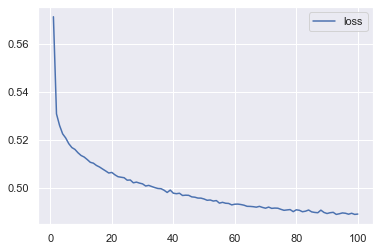

In [43]:
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

history_df.plot(y="loss")

<AxesSubplot:>

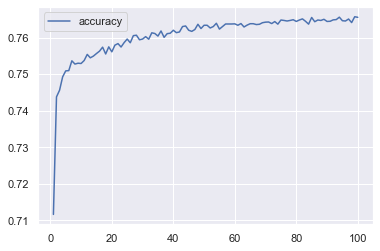

In [44]:
history_df.plot(y="accuracy")

In [45]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5415 - accuracy: 0.7448 - 290ms/epoch - 1ms/step
Loss: 0.5415080785751343, Accuracy: 0.7448396682739258


In [47]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization_Deliverable_3_2.h5")